In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold



In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [74]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [75]:
X = df.drop('math score',axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [76]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [77]:
num_features, cat_features

(Index(['reading score', 'writing score'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course'],
       dtype='object'))

In [78]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',categorical_transformer,  cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [79]:
X = preprocessor.fit_transform(X)

In [80]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [45]:


def evaluate_model(y_true, y_pred):
    mae= mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    r2_square = r2_score(y_true, y_pred)
    return mae,rmse,r2_square


In [89]:
models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
    'XGBRegressor': XGBRegressor(),
    'SVR': SVR()
}
model_list = []
r2_list = []
scores_df = pd.DataFrame(columns=['Model', 'Train MAE', 'Train RMSE', 'Train R2', 'Test MAE', 'Test RMSE','Test R2'])

for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print(f'Train MAE: {model_train_mae}, Train RMSE: {model_train_rmse}, Train R2: {model_train_r2}')
    print(f'Test MAE: {model_test_mae}, Test RMSE: {model_test_rmse}, Test R2: {model_test_r2}')

    scores_df.loc[i] = [model_name, model_train_mae, model_train_rmse, model_train_r2, model_test_mae, model_test_rmse, model_test_r2]

    print('='*35)
    print('\n')
    


KNeighborsRegressor
Train MAE: 4.51675, Train RMSE: 5.707884897227694, Train R2: 0.8554876322327585
Test MAE: 5.621, Test RMSE: 7.253040741647602, Test R2: 0.7838129945787431


LinearRegression
Train MAE: 4.271484375, Train RMSE: 5.329287354885032, Train R2: 0.874022530822051
Test MAE: 4.2221875, Test RMSE: 5.425185408698029, Test R2: 0.8790464771743793


Ridge
Train MAE: 4.264987823725981, Train RMSE: 5.323324922741654, Train R2: 0.8743042615212909
Test MAE: 4.21110068801426, Test RMSE: 5.390387016935637, Test R2: 0.8805931485028738


Lasso
Train MAE: 5.206302661246526, Train RMSE: 6.593815587795565, Train R2: 0.8071462015863458
Test MAE: 5.157881810347763, Test RMSE: 6.519694535667419, Test R2: 0.8253197323627853


DecisionTreeRegressor
Train MAE: 0.01875, Train RMSE: 0.2795084971874737, Train R2: 0.9996534669718089
Test MAE: 6.08, Test RMSE: 7.6961029099148615, Test R2: 0.7565941092733411


RandomForestRegressor
Train MAE: 1.8408968750000003, Train RMSE: 2.31110763880835, Train R2: 

In [54]:
scores_df.sort_values(by=['Test MAE', 'Test RMSE', 'Test R2'], ascending=[True, True, False], inplace=True)
scores_df

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
2,Ridge,4.264988,5.323325,0.874304,4.211101,5.390387,0.880593
1,LinearRegression,4.271484,5.329287,0.874023,4.222188,5.425185,0.879046
7,GradientBoostingRegressor,3.722632,4.626939,0.905040,4.311820,5.577729,0.872149
8,CatBoostRegressor,2.405394,3.042664,0.958936,4.612532,6.008632,0.851632
5,RandomForestRegressor,1.825030,2.295423,0.976629,4.651067,5.996823,0.852214
6,AdaBoostRegressor,4.751174,5.802928,0.850635,4.728753,6.121869,0.845987
9,XGBRegressor,0.687467,1.007282,0.995500,5.057731,6.473307,0.827797
3,Lasso,5.206303,6.593816,0.807146,5.157882,6.519695,0.825320
10,SVR,4.869189,6.577007,0.808128,5.401539,8.126623,0.728600
0,KNeighborsRegressor,4.516750,5.707885,0.855488,5.621000,7.253041,0.783813


In [55]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 87.90


Text(0.5, 1.0, 'Actual vs Predicted')

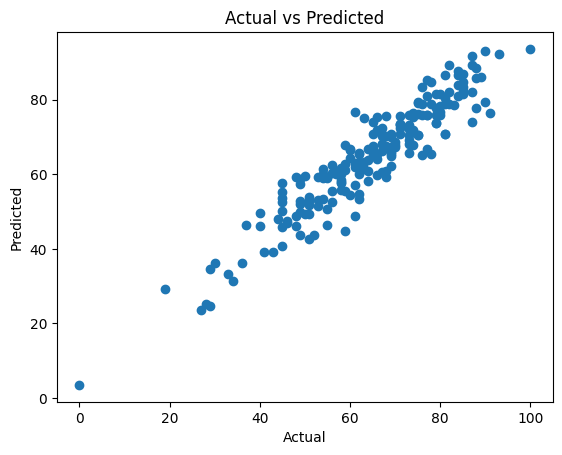

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

<Axes: xlabel='math score'>

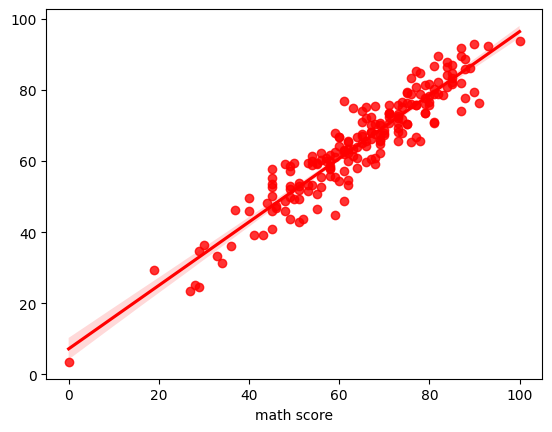

In [64]:
sns.regplot(x=y_test, y=y_pred, scatter=True, color='r')

In [65]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000


In [70]:
pred_df.Difference.describe()

count    200.000000
mean      -0.220938
std        5.434288
min      -15.812500
25%       -3.703125
50%       -0.312500
75%        3.125000
max       14.562500
Name: Difference, dtype: float64

<Axes: title={'center': 'Error Distribution'}, ylabel='Frequency'>

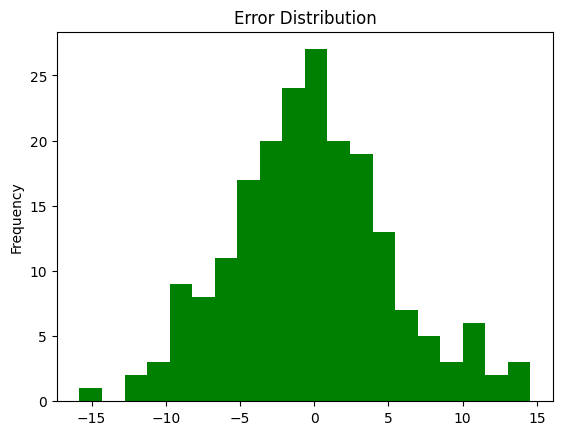

In [69]:
pred_df.Difference.plot(kind='hist',title='Error Distribution',bins= 20 ,color='g')